# Обзор библиотеки SciPy
[(**Sci**entific **Py**thon)](https://www.scipy.org/)

## Содержание
 * [Особенности](#Особенности)
 * [Интегрирование](#integr)
 * [Линейная алгебра](#linalg)
 * [Оптимизация](#optim)
 * [Задача линейного программирования](#linprog)
 * [Задание](#task)

# Особенности

`SciPy` — библиотека с открытым исходным кодом, предназначенная для выполнения научных и инженерных расчётов.

Возможности:
- поиск минимумов и максимумов функций;
- вычисление интегралов функций;
- поддержка специальных функций;
- обработка сигналов;
- обработка изображений;
- решение обыкновенных дифференциальных уравнений;  
    и др.

Основной структурой данных в `SciPy` является многомерный массив, реализованный модулем `NumPy`.

SciPy ключает в себя множество пакетов, но мы рассмотрим только некоторые:
- integrate (интегрирование)
- linalg (линейная алгебра)
- interpolate (инструменты для интерполяции)
- optimize (средства оптимизации)

In [49]:
import numpy as np
import matplotlib.pyplot as plt

YOURID = 'F14DM'

from testerMF.testerMF import Tester 
testcase = Tester(userId=YOURID , day='1')

%matplotlib inline

Соединение установлено


# Интегрирование <a class="anchor" id="integr"></a>

Вычислим
$$
f(x) = \int_0^4 x^2 dx
$$ 

In [17]:
import scipy.integrate

f = lambda x: x**2
ans, err = scipy.integrate.quad(f, 0, 4)
print(ans)

21.333333333333336


Вычислим
$$
f(x, y) = \int_0^2 \int_0^1 xy^2 dy dx 
$$ 

In [18]:
f = lambda y, x: x*y**2
ans, err = scipy.integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)
print(ans)

0.6666666666666667


In [19]:
f = lambda y, x: 1/(x**2)*(1-y)
ans, err = scipy.integrate.dblquad(f, 1, 2, lambda x: 0, lambda x: x**0.5)
print(ans)

0.23921284734693232


# Линейная алгебра <a class="anchor" id="linalg"></a>

Линейная алгебра — это раздел математики, изучающий векторы, векторные пространства, линейные преобразования и системы линейных уравнений.

### Собственные числа и собственные векторы
Для квадратных матриц определены понятия собственного вектора и собственного числа.

Пусть $A$ — квадратная матрица и $A \in \mathbb{R}^{n \times n}$. **Собственным вектором** (eigenvectors) матрицы $A$ называется такой ненулевой вектор $x \in \mathbb{R}^{n}$, что для некоторого $\lambda \in \mathbb{R}$ выполняется равенство:   
$$Ax = \lambda x$$
При этом $\lambda$ называется **собственным числом** (eigenvalues) матрицы $A$. 
Собственные числа и собственные векторы матрицы играют важную роль в теории линейной алгебры и ее практических приложениях.   

   

In [20]:
import scipy.linalg

In [21]:
# симметричная матрица
# собственные значения симметричной матрицы - ортогональны
m = np.array(
    [
        [3, 4], 
        [4, 3]
    ]
)
print(m)

[[3 4]
 [4 3]]


In [22]:
# eigenvalues & eigenvectors
eigval, eigvect = scipy.linalg.eig(m)

In [23]:
# собственные векторы по столбцам
eigvect

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [24]:
# собсвтенные вектора нормированы
scipy.linalg.norm(eigvect[:, 0])

0.9999999999999999

In [25]:
eigval

array([ 7.+0.j, -1.+0.j])

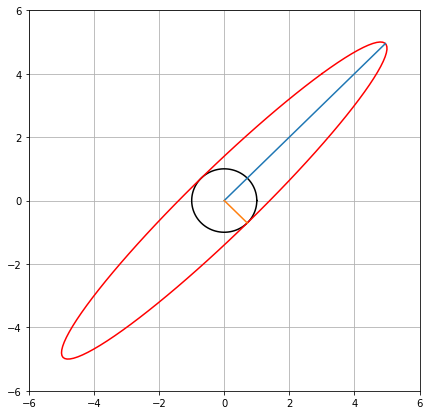

In [26]:
# посмотрим что станет с окружностью после линейного преобразования

def circle(angle, r=1):
    x = r * np.cos(angle)
    y = r * np.sin(angle)
    return x, y

angle = np.linspace(0, 2 * np.pi, 100)
x, y = circle(angle)

fig = plt.figure(figsize=(7, 7))
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.grid(True)
vec = np.dot(m,  np.array([x, y]))  # линейное преобразование
plt.plot(x, y, color='black')
plt.plot(vec[0], vec[1], color='red');
plt.plot([0, eigvect[0, 0] * eigval[0].real], [0, eigvect[1, 0] * eigval[0].real]) # первый собственный вектор
plt.plot([0, eigvect[0, 1] * eigval[1].real], [0, eigvect[1, 1] * eigval[1].real]) # второй собственный вектор

### Обратная матрица

Для квадратных невырожденных матриц определено понятие **обратной** матрицы. 

Пусть $A$ — квадратная невырожденная матрица. Матрица $A^{-1}$ называется **обратной матрицей** к $A$, если 

$$AA^{-1} = A^{-1}A = I,
$$ 

где $I$ — единичная матрица.  

In [27]:
a = np.array(
    [
        [1, 2, 1], 
        [1, 1, 4], 
        [2, 3, 6]
    ]
)
a_inv = scipy.linalg.inv(a)

In [28]:
print(a_inv)

[[ 6.  9. -7.]
 [-2. -4.  3.]
 [-1. -1.  1.]]


In [29]:
np.dot(a, a_inv)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Детерминант матрицы


Для матрицы $2 \times2$
$$
\begin{vmatrix}
  a & b\\
  c & d
\end{vmatrix}
= ad - bc
$$ 

In [30]:
m = np.array(
    [
        [3, 4], 
        [4, 3]
    ]
)

scipy.linalg.det(m)

-7.0

In [31]:
m[0, 0] * m[1, 1] - m[1, 0] * m[0, 1]

-7

### Решение системы линйных алгебраических уравнений (СЛАУ)

Общий вид системы линейных алгебраических уравнений:

$$\begin{cases}
 a_{11}x_{1}+a_{12}x_{2}+\dots +a_{1n}x_{n}=b_{1}\\
a_{21}x_{1}+a_{22}x_{2}+\dots +a_{2n}x_{n}=b_{2}\\
\dots \\
a_{m1}x_{1}+a_{m2}x_{2}+\dots +a_{mn}x_{n}=b_{m}\\
\end{cases}$$

Здесь $m$ — количество уравнений, а $n$  — количество переменных, $ x_{1},x_{2},\dots ,x_{n}$ — неизвестные, которые надо определить, коэффициенты $a_{11},a_{12},\dots ,a_{mn}$ и свободные члены $b_{1},b_{2},\dots ,b_{m}$ предполагаются известными.  

Система линейных алгебраических уравнений может быть представлена в матричной форме как:

$$\begin{pmatrix}
a_{11}&a_{12}&\cdots &a_{1n}\\a_{21}&a_{22}&\cdots &a_{2n}\\
\vdots &\vdots &\ddots &\vdots \\
a_{m1}&a_{m2}&\cdots &a_{mn}
\end{pmatrix}
\begin{pmatrix}x_{1}\\x_{2}\\\vdots \\x_{n}\end{pmatrix}
\begin{pmatrix}b_{1}\\b_{2}\\\vdots \\b_{m}\end{pmatrix}$$
или
$$Ax = b$$

**Критерий совместности СЛАУ (теорема Кронекера — Капелли)**   
Система линейных алгебраических уравнений совместна тогда и только тогда, когда ранг её основной матрицы равен рангу её расширенной матрицы, причём система имеет единственное решение, если ранг равен числу неизвестных, и бесконечное множество решений, если ранг меньше числа неизвестных.

Ранг - максимальное число линейно независимых строк (столбцов).

Пример

$$\begin{cases}
2 x_{1} + 4 x_{2}+ 3 x_{3}=3 \\
4 x_{1} + 9  x_{2} - x_{3}=6 \\
3 x_{1} + 6 x_{2} + 2 x_{3}=4.5 
\end{cases}$$

In [32]:
A = np.array(
    [
        [2, 4,  3],
        [4, 9, -1],
        [3, 6,  2]
    ]
)

b = np.array(
    [3, 6, 4.5]
)

In [33]:
from numpy.linalg import matrix_rank

In [34]:
# найдем ранг расширенной матрицы 
matrix_rank(np.column_stack((A, b))) == matrix_rank(A)

True

In [35]:
x = scipy.linalg.solve(A, b)
print(x)

[ 1.5 -0.   0. ]


In [36]:
# Пример с матрицей меньшего ранга
A = np.array(
    [
        [2, 4,  3],
        [4, 8, -1],
        [3, 6,  2]
    ]
)
matrix_rank(A)

2

In [37]:
x = scipy.linalg.solve(A, b)

LinAlgError: Matrix is singular.

# Оптимизация <a class="anchor" id="optim"></a>

При помощи `scipy` можно решать различные задачи оптимизации. scipy предоставляет целый набор различных методов оптимизации.

In [38]:
import scipy.optimize

Положим нам дана некоторая функция:

In [39]:
f = lambda x: x ** 2 + 10 * np.sin(x) + 4 * np.cos(x / 2.)

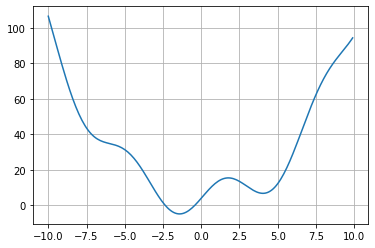

In [40]:
x = np.arange(-10, 10, 0.1)
plt.grid(True)
plt.plot(x, f(x));

Найдем миниум.  
`Scipy` предоставляет общий способ нахождения минимума функции. Ему нужно передать саму функцию и **начальное приближение**, начиная с которого алгоритм будет искать минимум

### Минимизация
Алгоритм BFGS (алгоритм Бройдена — Флетчера — Гольдфарба — Шанно) — один из наиболее широко применяемых алгоритмов минимизации.  
[Подробнее о BFGS](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D1%80%D0%BE%D0%B9%D0%B4%D0%B5%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BB%D0%B5%D1%82%D1%87%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%93%D0%BE%D0%BB%D1%8C%D0%B4%D1%84%D0%B0%D1%80%D0%B1%D0%B0_%E2%80%94_%D0%A8%D0%B0%D0%BD%D0%BD%D0%BE)

Документация по [optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)

In [41]:
# x0 - начальное приближение
# method - алгоритм минимизации (по умолчанию BFGS)
res_obj = scipy.optimize.minimize(f, x0=2, method='BFGS')
res_obj

      fun: 6.761126303089075
 hess_inv: array([[0.09781323]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([4.03513285])

In [42]:
x_min = res_obj['x'][0]
print(x_min)

4.035132849327052


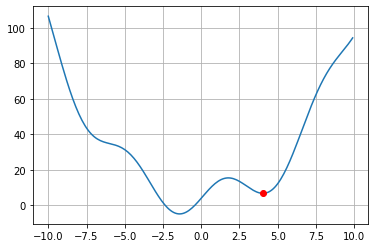

In [43]:
x = np.arange(-10, 10, 0.1)
plt.grid(True)
plt.plot(x, f(x));
plt.plot(x_min, f(x_min), 'o', c='r', );

Если выбрать неудачное начальное приближение, то возможно будет найден локальный, а не глобальный минимум

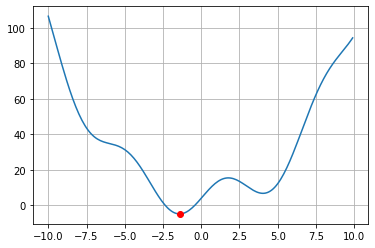

In [46]:
x_min =  scipy.optimize.minimize(f, x0=-5, method='BFGS')['x'][0]
x = np.arange(-10, 10, 0.1)
plt.grid(True)
plt.plot(x, f(x));
plt.plot(x_min, f(x_min), 'o', c='r', );

# Задача линейного программирования <a class="anchor" id="linprog"></a>

Линейное программирование — математическая дисциплина, посвящённая теории и методам решения экстремальных задач на множествах  n-мерного векторного пространства, задаваемых системами линейных уравнений и неравенств.

**Пример**


Колхоз имеет возможность приобрести не более 19 трехтонных автомашин и не более 17 пятитонных. Отпускная цена трехтонного грузовика - 4000 руб., пятитонного - 5000 руб. Колхоз может выделить для приобретения автомашин 141 тысяч рублей. Сколько нужно приобрести автомашин, чтобы их суммарная грузоподъемность была максимальной?

Пусть x - число трёхтонных машин, y - число пятитонных машин.

Тогда

\begin{equation*}
\begin{array}{ll@{}ll}
\text{maximize}  & \displaystyle 3x+5y &\\
\text{subject to}& \displaystyle 0 \leq x \leq 19  \\
                 & \displaystyle 0 \leq y \leq 17  \\
                 & \displaystyle 4x+5y \leq 141 
\end{array}
\end{equation*}

In [54]:
c = [-3, -5]

A_ub = [
    [1, 0],
    [0, 1],
    [4, 5]
]

b_ub = [
    19,
    17,
    141
]

scipy.optimize.linprog(c=c, A_ub=A_ub, b_ub=b_ub)

     fun: -127.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 5.,  0.,  0.])
  status: 0
 success: True
       x: array([ 14.,  17.])

# Задание <a class="anchor" id="task"></a>

Получить решение нелинейной задачи оптимизации

\begin{equation*}
\begin{array}{ll@{}ll}
\text{minimize}  & \displaystyle x_1 x_4 (x_1 + x_2 + x_3) + x_3 &\\
\text{subject to}& \displaystyle x_1 x_2 x_3 x_4 \geq 25 \\
                 & \displaystyle x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40 \\
                 & \displaystyle 1 \leq x_1, x_2, x_3, x_4 \leq 5  \\
                 & \displaystyle x_{start} = (1, 5, 5, 1)  \\
\end{array}
\end{equation*}


Подсказка https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


In [57]:
from scipy.optimize import minimize, NonlinearConstraint

In [77]:
objective = lambda x: x[0] * x[3] * (x[0] + x[1] + x[2]) + x[2]

cons =(
    {'type': 'ineq', 'fun': lambda x: x[0] * x[1] * x[2] * x[3] - 25},
    {'type': 'eq', 'fun': lambda x: (x[0]**2) + (x[1]**2) + (x[2]**2) + (x[3]**2) -40}
    
)

bnds = ((1, 5),(1, 5),(1, 5),(1, 5))
x0 = (1,5,5,1)

In [78]:
res_obj = scipy.optimize.minimize(objective, 
                                  x0=x0, 
                                  method='SLSQP',
                                  bounds=bnds,
                                  constraints=cons)

In [79]:
testcase.sendAssert(part='1', task='6', val=res_obj.fun, base = 17.01, clouse = ">=")
res_obj

Решение отправлено на проверку
Начало тест кейса, получаем данные...
Test Case пройден


     fun: 17.01401724556073
     jac: array([14.57227039,  1.37940764,  2.37940764,  9.56415081])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.74299607, 3.82115466, 1.37940764])